<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">

**Егор, привет!**

Меня зовут Василий Митров и я буду проверять твой проект. Предлагаю общаться на «ты». Если это неприемлемо, то дай мне знать и мы перейдем на «вы». Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.

Для удобства я оставлю комментарии в отдельных ячейках Markdown с заголовком «Комментарий ревьюера». Пожалуйста, не перемещай, не изменяй и не удаляй их - так наше общение будет более продуктивным. Я буду использовать цветовую разметку:

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера</b> 
    
✍ Так выделены самые важные замечания. Без их отработки проект не будет принят. При проверке я обращаю внимание не только на код, но и на интерпретацию и анализ результатов, а также соответствие данных техническому заданию.
</div>

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера</b> 
    
📝 Так выделены небольшие замечания или рекомендации. Постарайся, пожалуйста, учесть эти комментарии в этом проекте или в будущих проектах.
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера</b> 
    
👍 Так выделены все остальные комментарии, включая рекомендации, позитивные моменты или какие-то рассуждения и пояснения.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Например, вот так. Также, если есть какие-то вопросы, или что-то осталось непонятным по ревью - спрашивай в таких блоках и я постараюсь дать ответ.
</div>

---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Рекомендую добавить ход и цель исследования. Пример можно посмотреть в самом первом проекте (Музыка городов)
</div>

**Цель исследования** — изучение рынка недвижимости и факторов, наиболее заметно влияющих на стоимость жилья. \
**Ход исследования:** \
Данные об объектах недвижимости получим из файла `real_estate_data.csv`. Работа пройдёт в три этапа:
* Предобработка данных
* Добавление в таблицу вспомогательных параметров
* Исследовательский анализ данных



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import seaborn as sns                                           #импортируем необходимые библиотеки
pd.options.display.float_format = '{:.2f}'.format               #для удобства численные значения приведем к формату с двумя знаками после запятой

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  #импортируем датасет

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Совет: выносить загрузку датасета в отдельную ячейку в соответствии с PEP8.
</div>

In [3]:
data.head(10) #выведем первые 10 строк таблицы на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [4]:
data.info() #выводим на экран общую информацию о датасете, а именно кол-во столбцов, их названия и типы содержащихся данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.isna().sum() #найдём пропуски в столбцах датасета

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Найдём долю пропусков по каждому из столбцов:

In [6]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Также мы можем посмотреть долю пропусков, и на основании этого принять решение о удалении, замене либо игнорировании пропусков, например: `pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')`
</div>

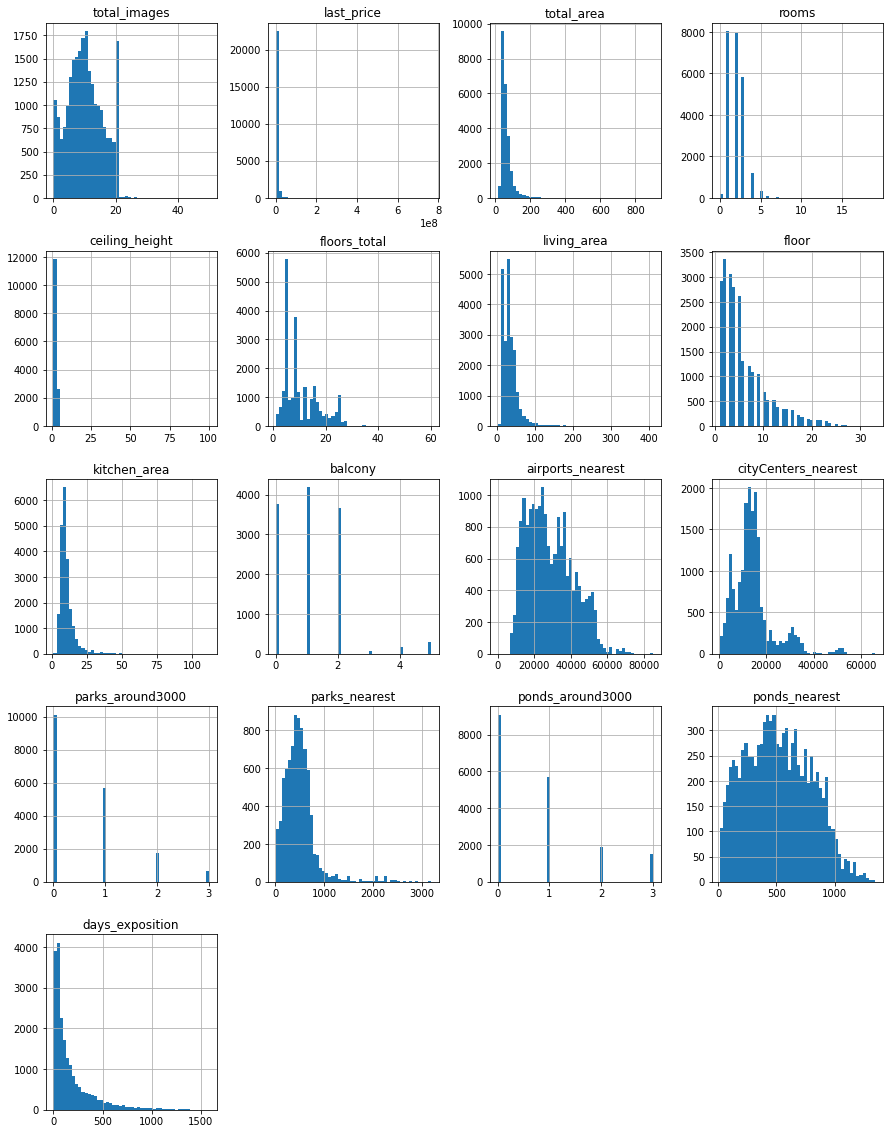

In [7]:
data.hist(bins=50, figsize=(15, 20))
plt.show()                               #строим гистограммы для всех числовых столбцов датасета

# Вывод:
Проанализировав данную таблицу, мы получили следующую информацию:
* Таблица имеет 22 столбца и 23699 строк.
* В ней встречаются следующие типы данных: bool, float64, int64, object.
* Столбцы **'ceiling_height'**, **'floors_total'**, **'living_area'**, **'is_apartment'**, **'kitchen_area'**, **'balcony'**, **'locality_name'**, **'airports_nearest'**, **'cityCenters_nearest'**, **'parks_around3000'**, **'parks_nearest'**, **'ponds_around3000'**, **'ponds_nearest'**, **'days_exposition'** имеют пропуски в значениях, но не все они понадобятся нам в дальнейшем.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Хорошая вводная часть.

Рекомендую создать универсальную функцию, которая будет принимать на вход датафрейм, а на выходе она будет выводить всего нужные характеристики, например, head, describe, info, дубликаты и т.п.
</div>

### Предобработка данных

In [8]:
data['ceiling_height'].sort_values().unique() #посмотрим на уникальные значения столбца 'ceiling_height'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [9]:
data['ceiling_height'].isna().sum() #проверим на пропуски

9195

In [10]:
print(data['ceiling_height'].describe())
print('Кол-во пропущенных строк: ', round(9195 / 23699 * 100), '%')  #выведем краткую статистическую информацию и процент пропусков

count   14504.00
mean        2.77
std         1.26
min         1.00
25%         2.52
50%         2.65
75%         2.80
max       100.00
Name: ceiling_height, dtype: float64
Кол-во пропущенных строк:  39 %


В данном столбце, как мы видим, 9195 пропущенных значений, что составляет около 39% от общего объёма данных. Удалять такое количество данных, очевидно, нецелесообразно. Также имеются аномальные значения, например высота потолка, равная 1м, или 100м.
Логично было бы предположить, что некоторые аномальные (как правило, двузначные) значения вызваны невнимательностью при вводе данных(пропущена запятая). Так, 27 или 32 метра — это 2,7 и 3,2м соответственно. \
В то же время, медианное значение 2,65м выглядит реалистичным. \
Тогда, заменим аномальные данные более логичными и заполним пропуски медианой:

In [11]:
for i in data['ceiling_height']:
    if i >= 9:
        data['ceiling_height'] = data['ceiling_height'].replace({i: i/10}) #применим цикл для замены аномальных значений

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #и заменим пропуски медианным значением

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно. Потолки это довольно стандартизированная величина, поэтому пропуски можно безболезненно заменить их медианой.
</div>

Определим частоту встречающихся значений в столбце **'ceiling_height'** и исследуем его на аномалии. Для этого построим гистограмму:

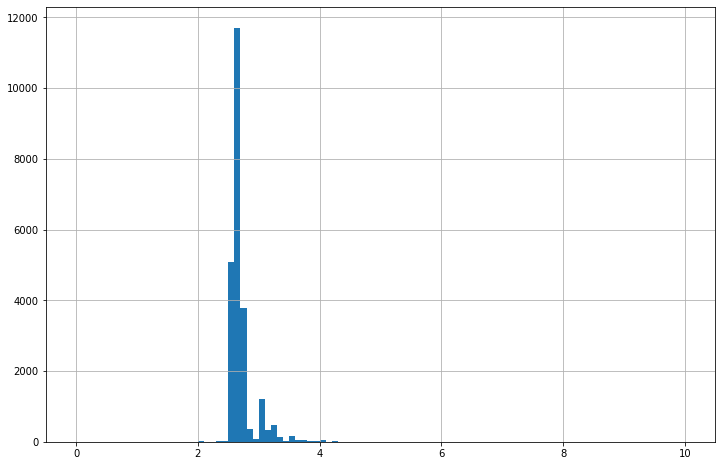

In [13]:
data['ceiling_height'].hist(bins = 100, range=(0,10), figsize=(12,8))
plt.show()

Увеличим масштаб гистограммы, чтобы понять нижнюю границу нормальных данных:

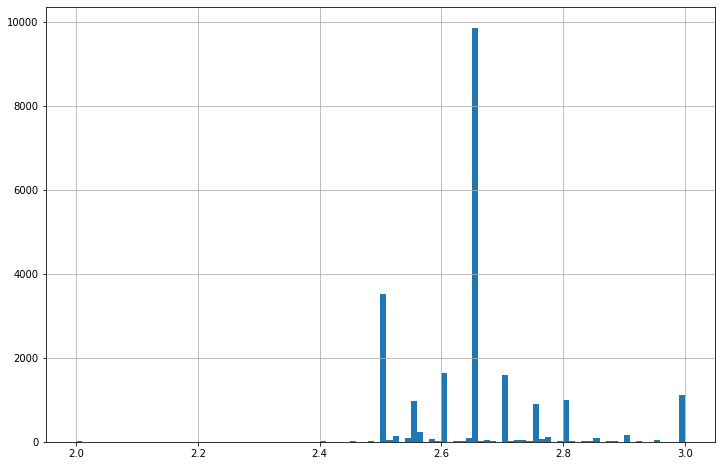

In [14]:
data['ceiling_height'].hist(bins = 100, range=(2,3), figsize=(12,8))
plt.show()

Как мы видим из гистограммы, большинство значений данного столбца лежит в диапазоне от 2,4м до 4м. Таким образом, остальные значения мы можем отсеять:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 4)]  #перезапишем датасет с отфильтрованными данными

В столбце **'floors_total'** не так много пропусков, и корректно заполнить их не представляется возможности. Поэтому я принял решение просто заполнить пропуски нулями:

In [17]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [18]:
data = data.dropna(subset=['floors_total'])
data = data.reset_index(drop=True)          

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верно, доля пропусков здесь менее 5% и для экономии времени их можно удалить.
</div>

Столбец **'first_day_exposition'** имеет тип object, приведём его к формату datetime64:

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 При чтении файла можно указать параметр `parse_dates: parse_dates=['first_day_exposition']`. Тогда пандас автоматически переведет список столбцов в даты. 
</div>

Cтолбец **'living_area'** имеет 1903 пропуска. Для их заполнения применим следующий метод:
* Рассчитаем коэффициент, отражающий отношение имеющихся значений общей площади к жилой площади.
* Последовательно разделим на данный коэффициент значения столбца с жилой площадью для строк с пустыми значениями жилой площади:

In [20]:
area_kof = data[data['living_area'].isnull() == False]['total_area'].mean() / data[data['living_area'].isnull()== False]['living_area'].mean() 
 
#Заполняем пропуски отношением общей площади на коэффициент:
data['living_area'] = data['living_area'].fillna(data['total_area']/area_kof)

В столбце **'kitchen_area'** также немного пропусков. Заполним их значением **0**:

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Исследуем столбец **'locality_name'** на явные и неявные дубликаты:

In [22]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Проверим на неявные:

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Заметим две главных проблемы с данным столбцом:
* Встречающаяся буква "ё"
* Повторяющиеся названия населённых пунктов

Эти проблемы можно решить, заменив все "ё" на "е" и приведя все названия нас. пунктов к единому стилю (избавившись в значениях от названий категорий, таких как "поселок", "село" и т.д.)

In [24]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True) #производим замену буквы "ё"

In [25]:
data['locality_name'] = data['locality_name'].replace(
    ['поселок ', 'городской ', 'коттеджный ', 'деревня ', 'городского типа ', 'село ', 'железнодорожной ', 'некоммерческое', 'садоводческое некоммерческое товарищество ', 'станции ', 'при ', 'Пансионат ', 'садовое '], '', regex=True)
data['locality_name'].unique() #производим замену категорий нас.пунктов на пустое значение и выводим на экран результат

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'товарищество Новая Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Красное Село',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Новый Свет', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин',
       'Победа', 'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Б

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отлично! Можно еще применить такой подход:
    
    df = df.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))

    len(df.locality_name.unique())
</div>

Изменим значения в столбце **last_price** на **int**.

In [26]:
data['last_price'] = data['last_price'].astype('int') #применим метод astype

Значения столбца **total_area** аналогично переведём в целочисленный формат:

In [27]:
data['total_area'] = data['total_area'].round().astype('int')

В столбце **'days_exposition'** 3181 пропуск. Логично предположить, что пропуски в данном случае означают, что квартира не снята с продажи. Заменим их на значение **0** и это будет говорить нам о том, что квартира до сих пор продаётся.

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(0)

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Замены пропусков нулями могут негативно отобразиться на графиках ввиде не нужных выбросов. И в таком случае необходимо будет ставить фильтры дабы отсеять их. Я бы здесь оставил пропуски, они нам не мешают.
</div>

Данные в столбцах **'cityCenters_nearest'**, **'parks_nearest'**, **'airports_nearest'**, на мой взгляд, невозможно заменить корректными данными, поэтому заменим пропуски в них "заглушками":

In [29]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(777.7)
data['parks_nearest'] = data['parks_nearest'].fillna(777.7)
data['airports_nearest'] = data['airports_nearest'].fillna(777.7)

Остальные столбцы, по моему мнению, не нуждаются в предобработке, так как использоваться в дальнейшем анализе не будут.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
В целом раздел выполнен качественно.
</div>

<div class="alert alert-danger" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
✍ 
К сожалению забыли посмотреть явные дубликаты :( Добавишь проверку?
</div>

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.2</b> 
    
👍 

</div>

### Посчитайте и добавьте в таблицу новые столбцы

Для расчёта стоимости квадратного метра добавим в таблицу новый столбец **'sq_m_price'**, значения в котором будут указаны в тыс.рублей за квадратный метр:

In [30]:
data['sq_m_price'] = (data['last_price'] / data['total_area']).astype(int)

Создадим столбцы, в которые будут записаны значения соответственно дня, месяца и года публикации:

In [31]:
data['public_day'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()
data['public_month'] = pd.DatetimeIndex(data['first_day_exposition']).month_name()
data['public_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Совет на будущие работы: обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://pythobyte.com/how-to-work-with-dates-and-times-in-python-0a176355/
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
    
Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Благодарю за полезный совет, обязательно воспользуюсь им в будущих работах
</div>

Для категоризации типов квартир по номеру этажа напишем функцию, которая бы автоматически разделила бы значения на три группы: "первый", "последний" и "другой" и добавила бы соответствующую категорию в созданный столбец 'floor_type'. 

In [32]:
def categorize_floor(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(categorize_floor, axis=1)

И, наконец, добавим к таблице ещё один столбец, в который запишем расстояние до центра города в километрах для каждой из квартир:

In [33]:
data['distance_to_center_km'] = round(data.query('cityCenters_nearest != 777.7')['cityCenters_nearest'] / 1000)

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Отлично! Приступим к исследовательскому анализу.
</div>

### Проведите исследовательский анализ данных

#### Изучение параметров объектов.

Исследуем параметры столбца с общей площадью:

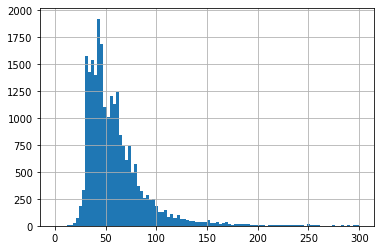

In [34]:
data['total_area'].hist(bins=100, range=(0,300))
plt.show()

In [35]:
data['total_area'].describe() #посмотрим на краткие статистические данные

count   23537.00
mean       60.17
std        35.04
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

По этим данным видим, что минимальная площадь квартиры - 12 кв.м., максимальная - 900 кв.м.. Распределение скошено вправо: среднее значение площади - 60,17 кв.м., медиана составляет 52 кв.м. Квартиры площадью выше 200 кв.м. - очень редки.

In [36]:
len(data.query('total_area > 200'))

213

Таких квартир всего 213 штук. На мой взгляд, эти данные можно отсеять и создать новый, очищенный датасет.

In [37]:
data_filtered = data.query('total_area <= 200')

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Верно, с большей площадью меньше предложений. Объекты выше 90-100 кв. м - это более дорогой сегмент.
</div>

Исследуем данные по жилой площади:

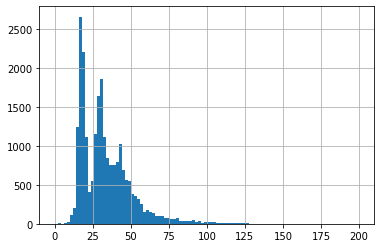

In [38]:
data_filtered['living_area'].hist(bins=100, range=(0,200))
plt.show()

И укрупним гистограмму для исследования нижней границы данных:

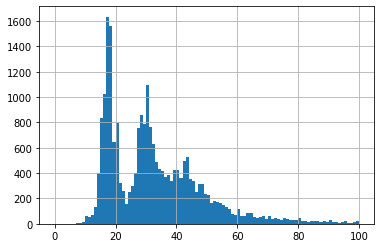

In [39]:
data_filtered['living_area'].hist(bins=100, range=(0,100))
plt.show()

In [40]:
data_filtered['living_area'].describe()

count   23324.00
mean       33.30
std        17.27
min         2.00
25%        19.00
50%        30.00
75%        42.00
max       164.70
Name: living_area, dtype: float64

По этим данным видим, что минимальная жилая площадь квартиры - 2 кв.м., максимальная - 164.7 кв.м.. Распределение неравномерно скошено вправо, наблюдаются два пика значений: в районе 18 и 30 кв.м.. Скорее всего, они связаны с тем, что часто владельцы квартир не располагают точным значением жилой площади. Среднее значение - 33,3 кв.м., медиана составляет 30 кв.м. Квартиры жилой площадью ниже 10 и выше 80 кв.м. - очень редки. Избавимся от редких данных и перезапишем датасет:

In [41]:
data_filtered = data_filtered.query('living_area > 10 and living_area < 80')

Исследуем данные по площади кухни:

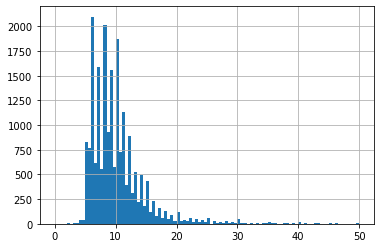

In [42]:
data_filtered.query('kitchen_area != 0')['kitchen_area'].hist(bins=100, range=(0,50)) #отфильтруем значения без заранее установленных
plt.show()                                                                   #заглушек

In [43]:
data_filtered.query('kitchen_area != 0')['kitchen_area'].describe()

count   20572.00
mean       10.17
std         5.09
min         1.30
25%         7.00
50%         9.00
75%        11.50
max        93.20
Name: kitchen_area, dtype: float64

Минимальная площадь кухни - 1,3 кв.м., максимальная - 93.2 кв.м.. Распределение скошено вправо: среднее значение площади - 10,3 кв.м., медиана составляет 9 кв.м. Кухни площадью ниже 5 и выше 20 кв.м. - очень редки. Но убирать квартиры с малой или нулевой площадью кухни, на мой взгляд, некорректно. Следуя данному условию мы можем "отрезать" слишком большую часть данных, туда могут попасть, например, квартиры-студии. Отфильтруем данные по верхнему значению и перезапишем новый датасет.

In [44]:
data_filtered = data_filtered.query('kitchen_area <= 20')

Рассмотрим данные цены:

In [45]:
data_filtered['last_price'].describe()

count       21963.00
mean      5303606.23
std       3653141.37
min        430000.00
25%       3350000.00
50%       4500000.00
75%       6200000.00
max     124000000.00
Name: last_price, dtype: float64

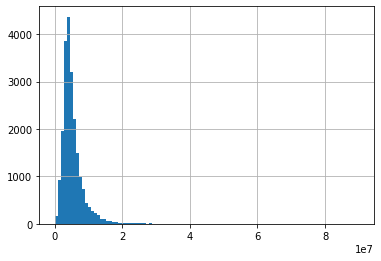

In [46]:
data_filtered['last_price'].hist(bins=100, range=(10000,90000000))
plt.show()

По данной гистограмме можем сделать предположение, что значения цены выше 25 млн. руб. являются редкими. 

Укрупним гистограмму, чтобы найти нижнюю границу отсева:

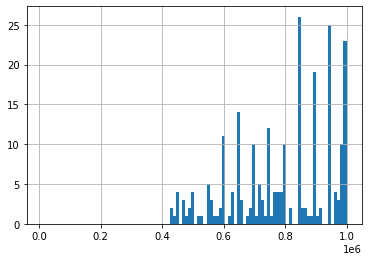

In [47]:
data_filtered['last_price'].hist(bins=100, range=(10000,1000000))
plt.show()

Таким образом, мы видим, что значения цены ниже 400 тыс. и выше 25 млн руб. - достаточно редки, поэтому их можно отсеять.

In [48]:
data_filtered = data_filtered.query('last_price > 400000 and last_price < 25000000')

Изучим отфильтрованные данные:

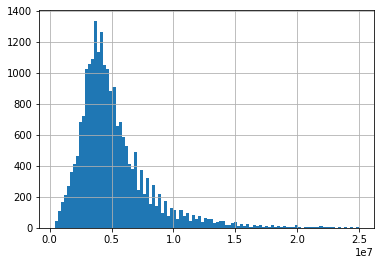

In [49]:
data_filtered['last_price'].hist(bins=100, range=(400000,25000000))
plt.show()

In [50]:
data_filtered['last_price'].describe()

count      21870.00
mean     5178528.92
std      2973900.17
min       430000.00
25%      3350000.00
50%      4500000.00
75%      6200000.00
max     24900000.00
Name: last_price, dtype: float64

Минимальная цена по вновь отфильтрованной таблице - 430 тыс. руб., максимальная - 24,9 млн руб.. Распределение является тяготеющим к нормальному, симметричному: средняя цена - 5178528,92 руб, медиана составляет 4,5 млн руб.

Изучим параметр "количество комнат", для этого построим столбчатую диаграмму:

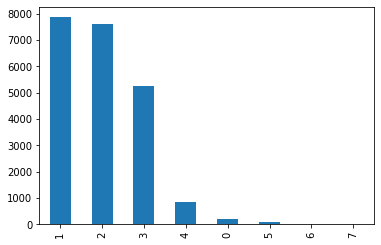

In [51]:
data_filtered['rooms'].value_counts().plot(kind='bar')
plt.show()

In [52]:
data_filtered['rooms'].value_counts()

1    7867
2    7600
3    5272
4     838
0     189
5      95
6       7
7       2
Name: rooms, dtype: int64

In [53]:
print('Доля однокомнатных квартир: ', round(len(data_filtered.query('rooms == 1')) / len(data_filtered) * 100, 2), '%')
print('Доля двухкомнатных квартир: ', round(len(data_filtered.query('rooms == 2')) / len(data_filtered) * 100, 2), '%')
print('Доля трёхкомнатных квартир: ', round(len(data_filtered.query('rooms == 3')) / len(data_filtered) * 100, 2), '%')
print('Доля четырёхкомнатных квартир: ', round(len(data_filtered.query('rooms == 4')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир больше 4 комнат: ', round(len(data_filtered.query('rooms > 4')) / len(data_filtered) * 100, 2), '%')

Доля однокомнатных квартир:  35.97 %
Доля двухкомнатных квартир:  34.75 %
Доля трёхкомнатных квартир:  24.11 %
Доля четырёхкомнатных квартир:  3.83 %
Доля квартир больше 4 комнат:  0.48 %


Видим, что самыми популярными на рынке являются одно- и двух- комнатные квартиры (более 7000 объявлений в обеих категориях): доля и тех и других составляет около 35%. Менее популярны трёхкомнатные квартиры - 4856 объявлений около 24%. Наконец, четырёхкомнатных - 765 объявлений, что является около 4% от общего числа. Доля квартир больше 4 комнат составляет меньше 0,5 процента.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍Однокомнатные популярней по ряду причин: цена(доступней для одиноких людей, а также людям в гражданском браке), рентабельность(покупка с целью продать дороже, а так же сдача в наём для приезжих, студентов и т.д), наследство. 
</div>

Вновь обратимся к гистограмме распределения высоты потолков:

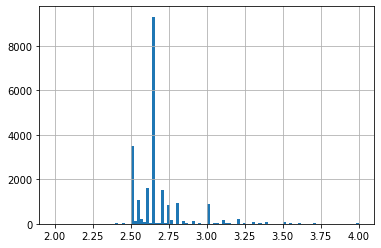

In [54]:
data_filtered['ceiling_height'].hist(bins=100, range=(2,4))
plt.show()

In [55]:
data_filtered['ceiling_height'].describe()

count   21870.00
mean        2.68
std         0.18
min         2.40
25%         2.60
50%         2.65
75%         2.70
max         4.00
Name: ceiling_height, dtype: float64

На этапе предобработки мы уже отфильтровали эти данные. Минимальная высота - 2,4м, максимальная - 4м. Средняя высота - 2,68м. Медиана составляет 2,65м. По графику видно, что самое частое значение высоты - медианное. Это связано с тем, что в предобработке данных мы большое количество пропущенных данных заменили им.

Обратимся к данным по этажам:

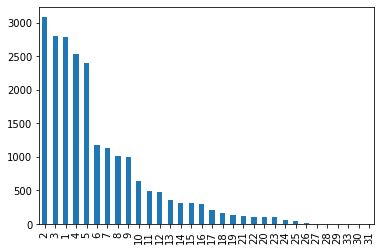

In [56]:
data_filtered['floor'].value_counts().plot(kind='bar')
plt.show()

In [57]:
print('Доля квартир на этажах с первого по пятый: ', round(len(data_filtered.query('floor >= 1 and floor <=5')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир на этажах с шестого по девятый: ', round(len(data_filtered.query('floor >= 6 and floor <=9')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир на этажах, начиная с десятого: ', round(len(data_filtered.query('floor >= 10')) / len(data_filtered) * 100, 2), '%')

Доля квартир на этажах с первого по пятый:  62.17 %
Доля квартир на этажах с шестого по девятый:  19.79 %
Доля квартир на этажах, начиная с десятого:  18.04 %


Как мы можем увидеть, большинство квартир на рынке (62,17%) расположены в пятиэтажных домах. Можем сделать предположение, что это связано с тем, что пятиэтажных домов намного больше остальных. Немалая доля квартир продаётся и в девяэтажных — почти 20%. Доля всех остальных квартир на этажах начиная с десятого — 18%, что говорит нам о том, что домов с этажностью выше 10 — намного меньше.

Рассмотрим параметр "тип этажа":

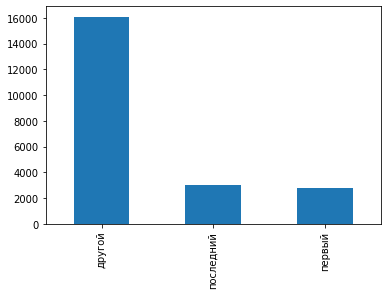

In [58]:
data_filtered['floor_type'].value_counts().plot(kind='bar')
plt.show()

In [59]:
print('Доля квартир на первом этаже: ', round(len(data_filtered.query('floor_type == "первый"')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир на последнем этаже: ', round(len(data_filtered.query('floor_type == "последний"')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир на других этажах: ', round(len(data_filtered.query('floor_type == "другой"')) / len(data_filtered) * 100, 2), '%')

Доля квартир на первом этаже:  12.71 %
Доля квартир на последнем этаже:  13.76 %
Доля квартир на других этажах:  73.53 %


Исходя из данных расчётов, нельзя однозначно сделать вывод, что первый и последний этажи не пользуются популярностью, т.к. количество значений "других" этажей гораздо выше.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 Да, чаще всего продают не последний и не первый этажи - такие этажи могут быть проблемными (заглядывают прохожие, холодно, жарко, протекает крыша и т.д.)
    
Также это связано с этажностью строительства. Первый и последний этажи - это лишь по одному этажу, а группа "другой" включает в себя все этажи, кроме первого и последнего. Для 3-этажных домов мы бы увидели равномерное распределение, но строительство заметно выше, чем 3 этажа.
</div>

Рассмотрим столбчатую диаграмму этажности домов:

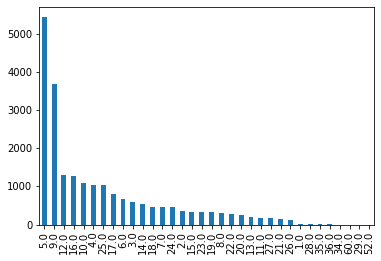

In [60]:
data_filtered['floors_total'].value_counts().plot(kind='bar')
plt.show()

In [61]:
print('Доля квартир в пятиэтажных домах: ', round(len(data_filtered.query('floors_total == 5')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в девятиэтажных домах: ', round(len(data_filtered.query('floors_total == 9')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в двенадцатиэтажных домах: ', round(len(data_filtered.query('floors_total == 12')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в шестнадцатиэтажных домах: ', round(len(data_filtered.query('floors_total == 16')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в десятиэтажных домах: ', round(len(data_filtered.query('floors_total == 10')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в четырёхэтажных домах: ', round(len(data_filtered.query('floors_total == 4')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в двадцатипятиэтажных домах: ', round(len(data_filtered.query('floors_total == 25')) / len(data_filtered) * 100, 2), '%')
print('Доля квартир в домах другой этажности: ', round(len(data_filtered.query('floors_total !=5 and floors_total !=9 and floors_total != 12 and floors_total != 16 and floors_total != 10 and floors_total != 4 and floors_total != 25')) / len(data_filtered) * 100, 2), '%')

Доля квартир в пятиэтажных домах:  24.81 %
Доля квартир в девятиэтажных домах:  16.8 %
Доля квартир в двенадцатиэтажных домах:  5.9 %
Доля квартир в шестнадцатиэтажных домах:  5.87 %
Доля квартир в десятиэтажных домах:  5.03 %
Доля квартир в четырёхэтажных домах:  4.79 %
Доля квартир в двадцатипятиэтажных домах:  4.69 %
Доля квартир в домах другой этажности:  32.11 %


После изучения данных расчётов, наше предыдущее предположение об этажности домов подтвердилось: доля квартир в пятиэтажных домах составляет почти 25%, далее идут девятиэтажные дома, их — 16,8%. \
Другая этажность встречается реже: так, например, доли 4-, 10-, 12-, 16-, 25-этажных домов — от 4,7 до 6% каждая. Доля квартир в домах другой этажности составляет почти треть — 32,11%

Рассмотрим значения удалённости квартир от центра:

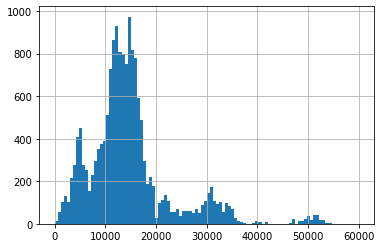

In [62]:
data_filtered.query('cityCenters_nearest != 777.7')['cityCenters_nearest'].hist(bins=100, range=(1,60000)) #не забыв про заглушки
plt.show()

In [63]:
data_filtered.query('cityCenters_nearest != 777.7')['cityCenters_nearest'].describe()

count   16505.00
mean    14726.01
std      8525.13
min       208.00
25%     10304.00
50%     13395.00
75%     16556.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

Минимальное расстояние до центра - 208м, максимальное - 65968м. Среднее растояние до центра = 14726м, медианное — 13395м.  Распределение скошено влево:  после пикового значения около среднего значения резкое падение графика вниз до отметки 20000м. Значения свыше 35000м можем считать редкими, их можно отсеять:

In [64]:
data_filtered = data_filtered.query('cityCenters_nearest < 35000')

Аналогичную работу проделаем со столбцом значений удалённости квартиры от аэропорта:

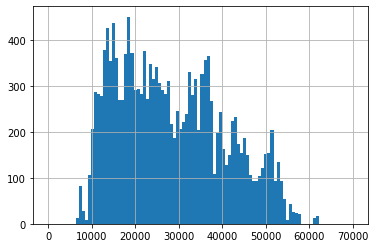

In [65]:
data_filtered.query('airports_nearest != 777.7')['airports_nearest'].hist(bins=100, range=(1,70000))
plt.show()

In [66]:
data_filtered.query('airports_nearest != 777.7')['airports_nearest'].describe()

count   16083.00
mean    28223.17
std     12252.38
min         0.00
25%     17942.00
50%     26521.00
75%     36827.00
max     61748.00
Name: airports_nearest, dtype: float64

Минимальное расстояние до центра - 0м, максимальное - 61748м. Среднее растояние до аэропорта = 28223.17м, медианное — 26521м. Распределение скошено вправо. Значения свыше 55000м можем считать редкими, отсеим их:

In [67]:
data_filtered = data_filtered.query('airports_nearest < 55000')

Аналогичную работу проделаем со столбцом значений удалённости квартиры от ближайшего парка:

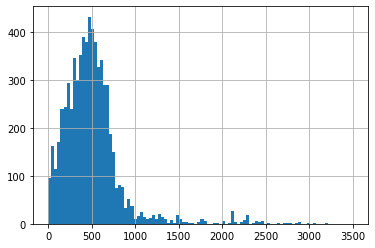

In [68]:
data_filtered.query('parks_nearest != 777.7')['parks_nearest'].hist(bins=100, range=(1,3500))
plt.show()

In [69]:
data_filtered.query('parks_nearest != 777.7')['parks_nearest'].describe()

count   6828.00
mean     496.98
std      340.10
min        1.00
25%      295.00
50%      460.00
75%      620.00
max     3190.00
Name: parks_nearest, dtype: float64

Минимальное расстояние до парка - 1м, максимальное - 3190м. Среднее растояние до парка — 496.98м, медианное — 460м. Распределение стремится к нормальному, симметричному. Значения свыше 1000м можем считать редкими, отфильтруем их:

In [70]:
data_filtered = data_filtered.query('parks_nearest <= 1000')

Исследуем данные на предмет публикации по дням недели:

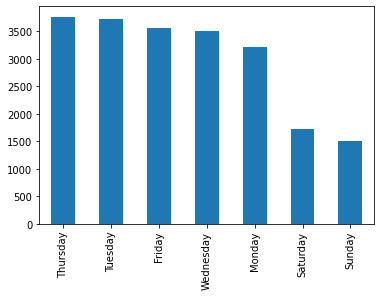

In [71]:
data_filtered['public_day'].value_counts().plot(kind='bar')
plt.show()

Из графика видим, что в выходные более чем в два раза меньше публикаций, чем в будние дни.

Теперь изучим данные публикаций объявлений по месяцам:

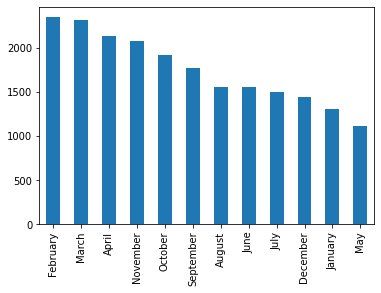

In [72]:
data_filtered['public_month'].value_counts().plot(kind='bar')
plt.show()

In [73]:
data_filtered['public_month'].value_counts()

February     2347
March        2308
April        2127
November     2080
October      1914
September    1764
August       1558
June         1555
July         1491
December     1441
January      1309
May          1106
Name: public_month, dtype: int64

По имеющимся данным можем сделать вывод, что в феврале больше всего публикаций: 2347. Меньше всего публикаций в мае — 1106.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍  В целом, праздничные месяцы отличаются меньшим предложением. Это нормально.
</div>

#### Изучение скорости продаж квартир.

Изучим, как быстро продавались квартиры. Логично предположить, что значение 0 в данном столбце означает, что квартира до сих пор находится на продаже, следовательно, оценить как долго она продаётся, мы не можем. Поэтому обратимся к столбцу **'days_exposition'** без значений, равных 0:

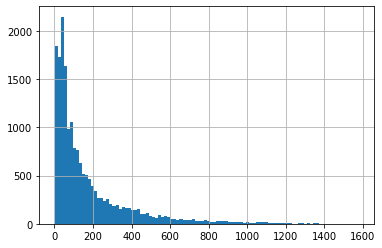

In [74]:
data_filtered.query('days_exposition != 0')['days_exposition'].hist(bins=100)  #построим гистограмму
plt.show()

Чтобы точнее оценить данные, воспользуемся методом .describe():

In [75]:
data_filtered.query('days_exposition != 0')['days_exposition'].describe()

count   18341.00
mean      173.64
std       212.02
min         1.00
25%        44.00
50%        92.00
75%       219.00
max      1580.00
Name: days_exposition, dtype: float64

И для наглядности построим боксплот:

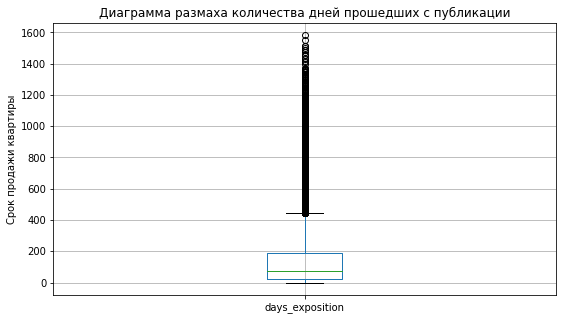

In [76]:
data_filtered.boxplot('days_exposition', figsize=(9, 5))
plt.title('Диаграмма размаха количества дней прошедших с публикации')
plt.ylabel('Срок продажи квартиры')
plt.show()

Найдём границу выбросов. Для этого воспользуемся формулой и найдём 1,5 межквартильных размаха, затем прибавим это значение к третьему квартилю.

In [77]:
print((219-44)*1.5+219)

481.5


Таким образом, все значения после 481-го дня публикации будем считать выбросами. Перезапишем датасет с учётом новой информации:

In [78]:
data_filtered = data_filtered.query('days_exposition < 482')

Теперь взглянем на вновь отфильтрованные данные с помощью гистограммы и метода .describe():

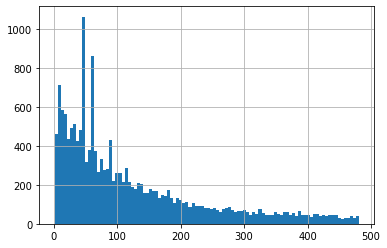

In [79]:
data_filtered.query('days_exposition != 0')['days_exposition'].hist(bins=100)
plt.show()

И укрупним масштаб:

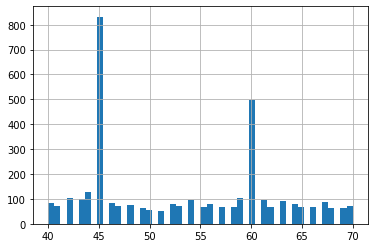

In [80]:
data_filtered.query('days_exposition != 0')['days_exposition'].hist(bins=50, range=(40,70))
plt.show()

In [81]:
data_filtered.query('days_exposition != 0')['days_exposition'].describe()

count   16794.00
mean      122.04
std       114.37
min         1.00
25%        40.00
50%        80.00
75%       174.00
max       481.00
Name: days_exposition, dtype: float64

Cреднее время продажи квартиры — 122 дня, тогда как медианное — 80 дней. \
На графике наблюдаются пики на значениях 45, 60 и 90 дней. Обратившись к условиям публикации объявлений сервиса "Яндекс.Недвижимость", мною были обнаружены следующие правила: 
* Объявления о продаже квартир стоимостью до 4,5млн бесплатно размещаются до 45 дней.
* Объявления о продаже квартир стоимостью от 4,5млн до 10млн бесплатно размещаются до 60 дней.
* Объявления о продаже квартир стоимостью от 10млн бесплатно размещаются до 90 дней. 

Что, на мой, взгляд, объясняет аномально большое количество снятых с публикации объявлений в эти дни. \
По этим данным можем сделать вывод, что квартиры лучшего всего продаются в период до 100 дней. По распределению графика видна прямая зависимость факта продажи квартиры от времени, прошедшего с момента публикации. Так, после 100 дней заметна тенденция сильного падения частоты продаж. Следовательно, чем дольше объявление находится на продаже, тем меньше шанс, что квартира будет продана.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
До 1.5 месяцев можно считать быстрой продажей
</div>

#### Изучение факторов, влияющих на общую стоимость объекта.

Для изучения этих факторов воспользуемся визуализацией данных и при необходимости будем искать корреляции Пирсона с помощью метода .corr:

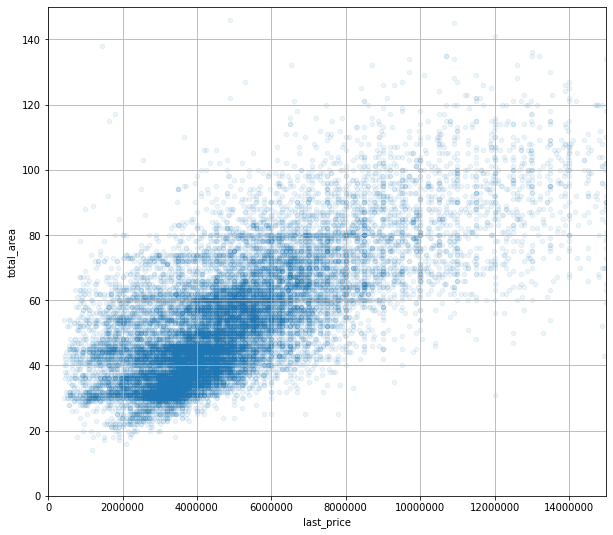

Коэффициент корреляции: 0.728


In [82]:
data_filtered.plot(x='last_price', y='total_area', kind='scatter', alpha=0.08, grid=True, figsize=(10,9))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlim([0, 15000000])
plt.ylim([0, 150])
plt.show()
print('Коэффициент корреляции:', '{:.3f}'.format(data_filtered['last_price'].corr(data_filtered['total_area'])))

Основываясь на данном графике и расчётах коэффициента корреляции, можем утверждать, что наблюдается прямая зависимость между параметрами "цена квартиры" и "общая площадь". \
Исходя из графика, можем заметить что наибольшая концетрация объявлений заключена в пределах цены 2,5-5 млн рублей и общей площади 30-50м². Это говорит о том, что большинство объявлений обладает данными параметрами.

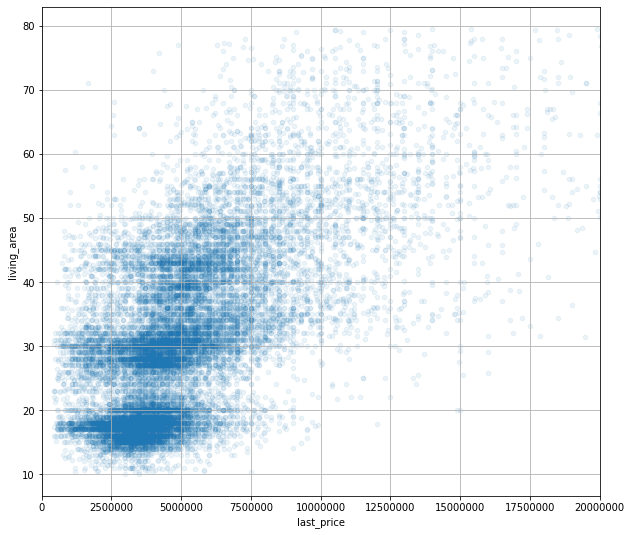

Коэффициент корреляции: 0.622


In [83]:
data_filtered.plot(x='last_price', y='living_area', kind='scatter', alpha=0.08, grid=True, figsize=(10,9))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlim([0, 20000000])
plt.show()
print('Коэффициент корреляции:', '{:.3f}'.format(data_filtered['last_price'].corr(data_filtered['living_area'])))

Коэффициент корреляции 0.622 говорит нам о значительной связи параметров "цена" и "жилая площадь", однако, не такой сильной, как в предыдущей примере. Наибольшее количество объявлений сосредоточено в пределах жилой площади 15-20м² и 27-32м² и ценой в 2,5-5 млн рублей.

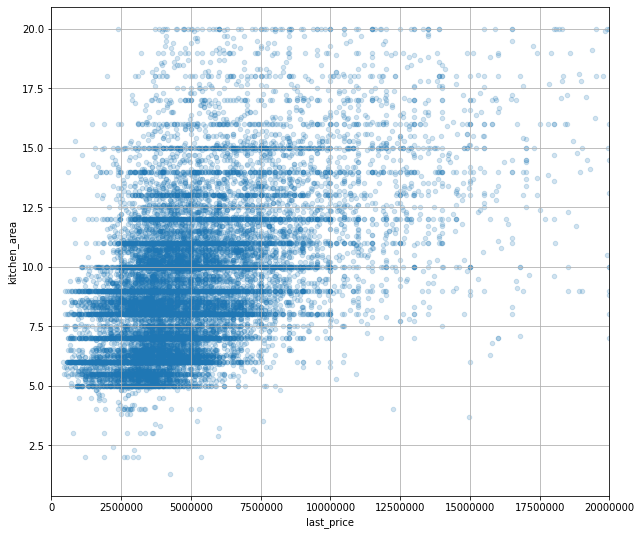

Коэффициент корреляции: 0.373


In [84]:
data_filtered.query('kitchen_area != 0').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.2, grid=True, figsize=(10,9))
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlim([0, 20000000])
plt.show()
print('Коэффициент корреляции:', '{:.3f}'.format(data_filtered['last_price'].corr(data_filtered['kitchen_area'])))

Между параметрами "цена" и "площадь кухни" корреляция ещё ниже, однако некоторая зависимость всё равно существует. Наибольшая доля объявлений концетрируется в пределах площади кухни 5-11м² и цены 2,5-5 млн рублей.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

Теперь оценим зависимость между количеством комнат и средней ценой квартир:

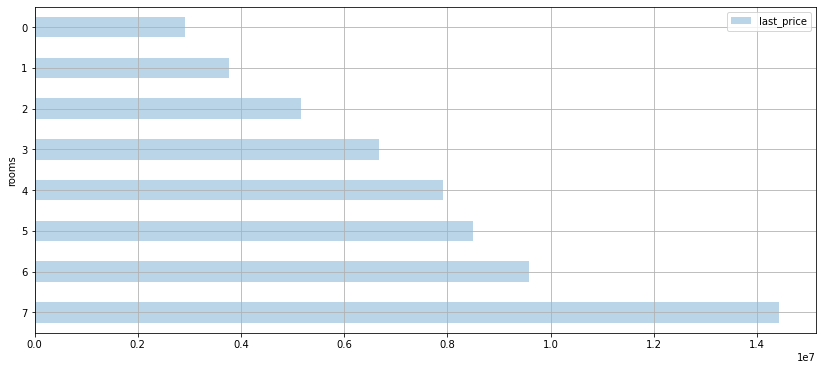

In [85]:
(
    data_filtered
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(14, 6), alpha=0.3, grid=True)
)
plt.show()

Исходя из графика, можем с уверенностью сказать, что между этими параметрами есть прямая зависимость: чем больше комнат, тем выше средняя стоимость квартиры.

Для определения взаимосвязи между ценой и этажом, на котором находится квартира также построим столбчатую диаграмму:

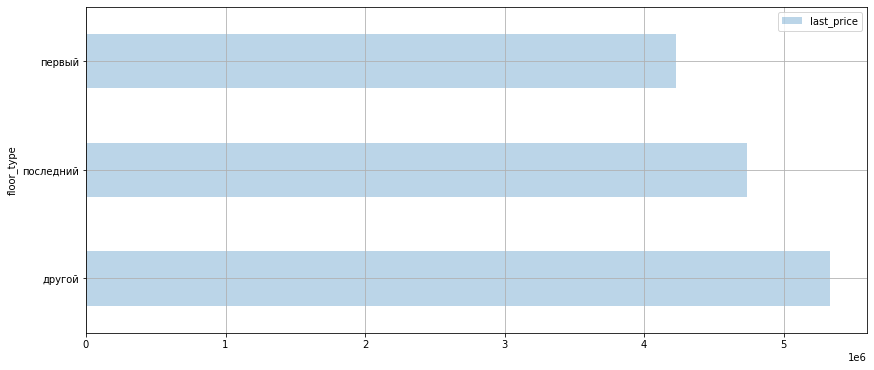

In [86]:
(
    data_filtered
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(14, 6), alpha=0.3, grid=True)
)
plt.show()

Видим, что самая высокая средняя стоимость у квартир, которые не находятся ни на первом, ни на последнем этаже. Самые дешёвые квартиры расположены на первом этаже. \
Таким образом, из данного графика мы можем сделать вывод, что цена квартиру напрямую зависит от этажа, на котором эта квартира расположена.

Теперь исследуем зависимость цены квартиры от даты публикации.

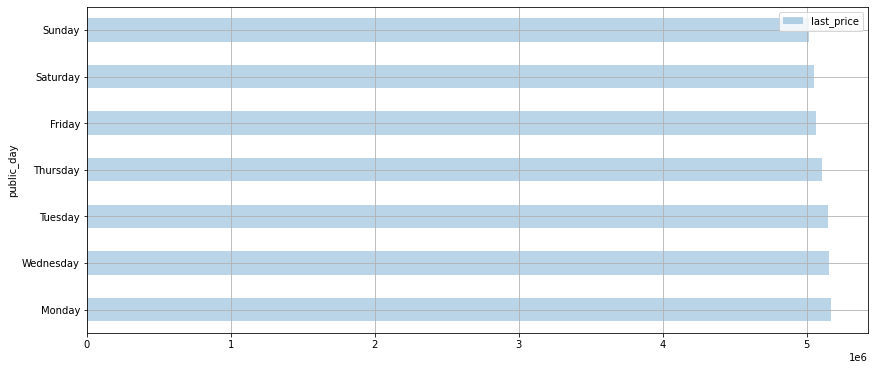

In [87]:
(
    data_filtered
    .pivot_table(index = 'public_day', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(14, 6), alpha=0.3, grid=True)
)
plt.show()

По графику видно, что не существует сильной зависимости цены от дня публикации. Однако, можно заметить, что минимальная средняя цена была зафиксирована в выходные дни, тогда как максимальная средняя цена квартир, выставленных на продажу — в понедельник.

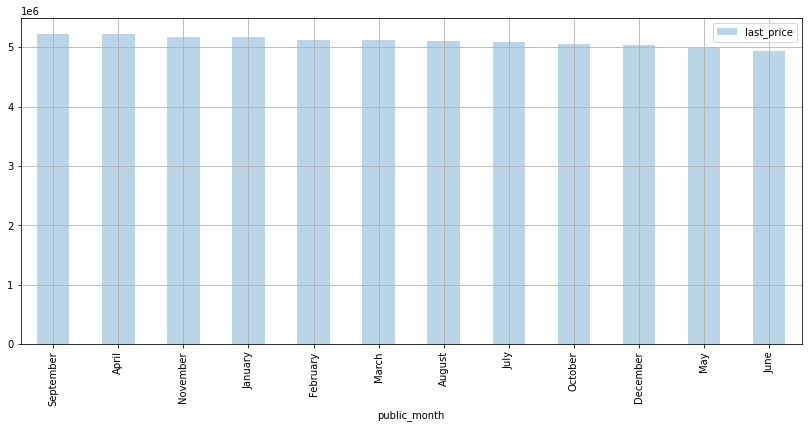

In [88]:
(
    data_filtered
    .pivot_table(index = 'public_month', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(14, 6), alpha=0.3, grid=True)
)
plt.show()

Анализируя данный график, можно прийти к выводу, что нет существенной связи между месяцем публикации и средней ценой квартир. В сентябре средняя цена квартир самая высокая, в июне — самая низкая.

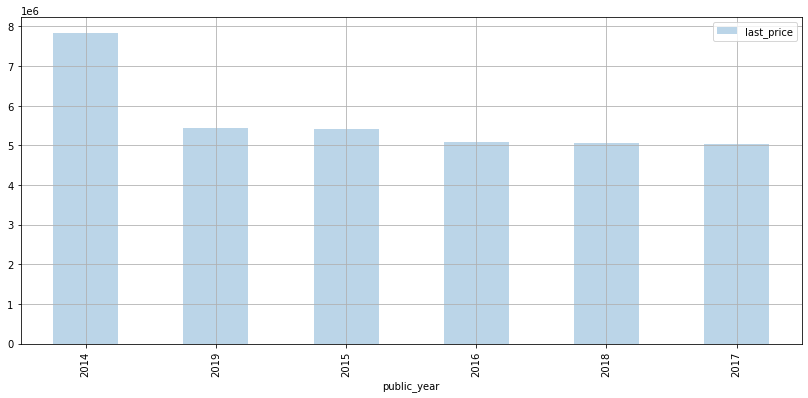

In [89]:
(
    data_filtered
    .pivot_table(index = 'public_year', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(14, 6), alpha=0.3, grid=True)
)
plt.show()

Видно, что в 2014 году была зафиксирована самая высокая средняя цена квартир — почти 8 млн руб. В остальные годы средняя стоимость менялась не так значительно, однако, можно заметить, что в 2019 выросла почти на 0,5 млн руб. по сравнению с предыдущими годами.

#### Промежуточный вывод.
Самыми значительными факторами, наиболее сильно влияющими на общую стоимость объекта, являются:
* Общая площадь квартиры
* Количество комнат
* Этаж, на котором расположена квартира

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Верная интерпретация полученных данных.
</div>

Теперь выявим 10 населённых пунктов с самой высокой и низкой стоимостью кв.м.. Для начала найдём нас. пункты с наибольшим количеством объявлений:

In [90]:
big_settlements = data_filtered['locality_name'].value_counts()
big_settlements.head(10)

Санкт-Петербург    12770
Мурино               537
Шушары               412
Кудрово              411
Всеволожск           357
Пушкин               310
Колпино              299
Гатчина              277
Парголово            254
Выборг               208
Name: locality_name, dtype: int64

Затем построим сводную таблицу и посмотрим на получившиеся значения:

In [91]:
total_area_pivot = data_filtered.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'median']) 
#строим сводную таблицу, выделив в качестве функций общее число объявлений и медианную цену
total_area_pivot.columns = ['count', 'median']                #затем избавимся от двухэтажных колонок и переименуем столбцы
total_area_pivot = total_area_pivot.query('count >= 208')     #отсеем значения ниже необходимого
total_area_pivot.sort_values(by='median')                     #и отсортируем полученную таблицу по возрастанию средней цены

,count,median
locality_name,,
Выборг,208,57979.00
Всеволожск,357,65517.00
Гатчина,277,67241.00
Колпино,299,74375.00
Шушары,412,76462.50
Мурино,537,86034.00
Парголово,254,95192.50
Кудрово,411,96296.00
Пушкин,310,98371.00


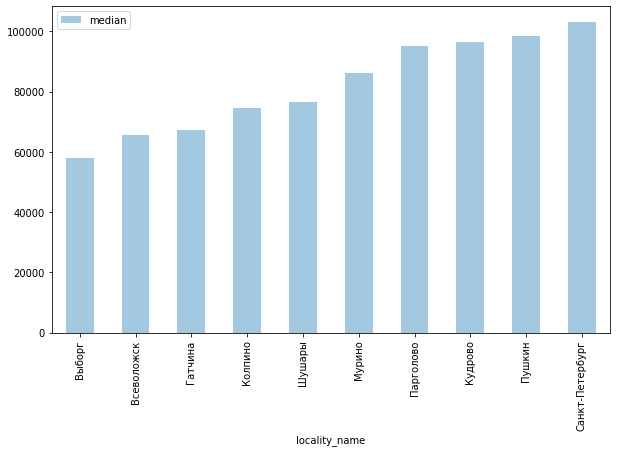

In [92]:
total_area_pivot.sort_values(by='median').plot(y='median', kind='bar', alpha=0.4, figsize=(10,6))
plt.show() #строим диаграмму

Таким образом, получим, что:
* Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург = 103.1 тыс. рублей за м²
* Населённый пункт с самой низкой стоимостью жилья: Выборг = 58 тыс. рублей за м²

<div class="alert alert-warning" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
📝 
Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам.
  
Также хорошо бы визуализировать получаемую информацию.
 
</div>

Теперь исследуем зависимость стоимости квартир от их удалённости от центра. Для этого рассчитаем среднюю цену каждого километра и построим столбчатую диаграмму:

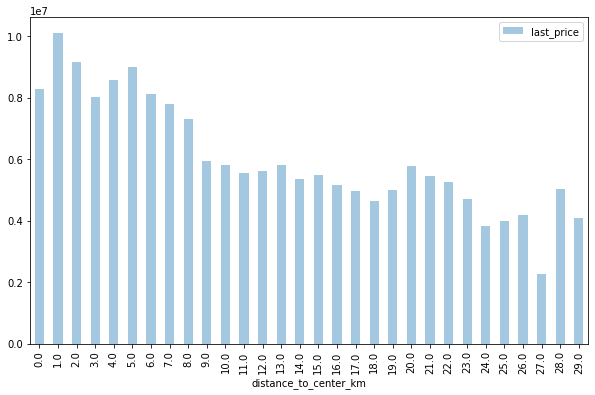

In [93]:
spb_pivot = (
    data_filtered.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_center_km', values='last_price', aggfunc='mean').reset_index()
)  #создаём сводную таблицу, в которой вычислим среднюю цену км, применив функцию mean
spb_pivot.plot(x='distance_to_center_km', y='last_price', kind='bar', alpha=0.4, figsize=(10,6))
plt.show() #строим диаграмму

Из диаграммы видно, что удалённость от центра напрямую влияет на стоимость жилья. Цены на жильё доходят до среднего значения в 100 тыс. за кв.м. в центре и затем плавно снижаются до расстояния в 8км. На мой взгляд, 8км являются некой границей центральной части города, чем и обусловлено снижение средней стоимости квадратного метра.

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍  Верно, дальше от центра - дешевле квартиры.
</div>

#### Вывод
Проведя исследование факторов, влияющих на общую стоимость объекта, можем заметить следующее:
* Существует прямая корреляция между параметрами "цена квартиры" и "общая площадь": чем больше площадь квартиры, тем выше цена.
* В меньшей степени эта зависимость выражена между параметрами "цена квартиры" и "жилая площадь" и ещё меньше — между ценой и  площадью кухни.
* Между количеством комнат и ценой объекта есть прямая зависимость: чем больше комнат, тем выше средняя стоимость квартиры. Максимальная стоимость у 7-комнатных квартир.
* Цена на квартиру напрямую зависит от этажа, на котором эта квартира расположена и самые дешёвые квартиры расположены, как правило, на первом этаже.
* Нет существенной связи между днём и месяцем публикации и средней ценой квартир, однако в 2014 году квартиры стоили дороже.
* Удалённость от центра напрямую влияет на стоимость жилья. 8км являются некой границей центральной части города, чем и обусловлено снижение средней стоимости квадратного метра.
* Самыми популярными на рынке являются одно- и двух- комнатные квартиры (более 7000 объявлений в обеих категориях): доля и тех и других составляет около 35%.
* Большинство квартир на рынке (62,17%) расположены в пятиэтажных домах.
* Медианное значение высоты потолка составляет 2,65м.
* Квартиры лучшего всего продаются в период до 100 дней. Чем дольше объявление находится на продаже, тем меньше шанс, что квартира будет продана.



### Общий вывод

Проведя всесторонний анализ данных сервиса "Яндекс.Недвижимость", удалось найти самые значительные факторы и параметры, наиболее сильно влияющие на стоимость квартиры:
* Общая площадь квартиры
* Количество комнат
* Этаж, на котором расположена квартира 

Были выявлены 10 населённых пунктов с самой высокой и низкой стоимостью м²:
* Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург = 103.1 тыс. рублей за м²
* Населённый пункт с самой низкой стоимостью жилья: Выборг = 58 тыс. рублей за м²

Средняя цена квартиры составляет 5178528,92 руб.. \
Средняя площадь жилья составляет 60 м². 

<div class="alert alert-success" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Ты очень серьезно подходишь к визуализации.

Вот пара ссылок на полезные источники:https://habr.com/ru/company/otus/blog/540526/, https://pythonru.com/biblioteki/seaborn-plot
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.1</b> 
    
👋  
Егор, замечательная работа, ты мыслишь нестандартно, это отличный навык, который у тебя уже есть, ты последователен и вдумчив. Твою работу очень интересно читать и проверять. Ты молодец! Я оставил одну обязательную поправку для тебя и после этого буду готов сразу принять проект. 

Удачи в доработках, жду!  

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>Комментарий студента</b> 
    
Благодарю за советы и указания на недоработки проекта, я получил ценный опыт. Айдаром, конечно, меня ещё не называли =)
</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-success">
<b>Обратная связь v.2</b> 
    
👋 
      
Егор, максимально прошу меня простить за это недоразумение :((( Иногда приходиться проверять проекты нескольких студентов сразу и на разную тему. Грубейшая моя ошибка. Прошу еще раз у тебя прощения.
    
Спасибо тебе за хорошую работу.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод